# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import pickle
import warnings as wr
wr.filterwarnings("ignore")

In [3]:
# reading and loading the dataset
df = pd.read_csv(r'C:\Users\User\Desktop\Assigment_4\census_income.csv')
df.head()             
#creating data frame

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#to know missing values, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are no null values in the dataset, 14 columns and 6 of them are of int64(integer) datatype and 9 are object(string) datatypes and no variables are of type float64.

Almost all supervised statistical learning algorithms only accept numerical values as input, it has become necessary to preprocess variables of type "object" before using this dataset as input for training a model.

In [5]:
#checking the data dimension
df.shape

(32560, 15)

There are 32560 rows and 15 columns in the dataset

In [6]:
#to check datatypes of all the columns 
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

It contains integer and object datatypes.

# EDA

In [7]:
#checking null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null values.

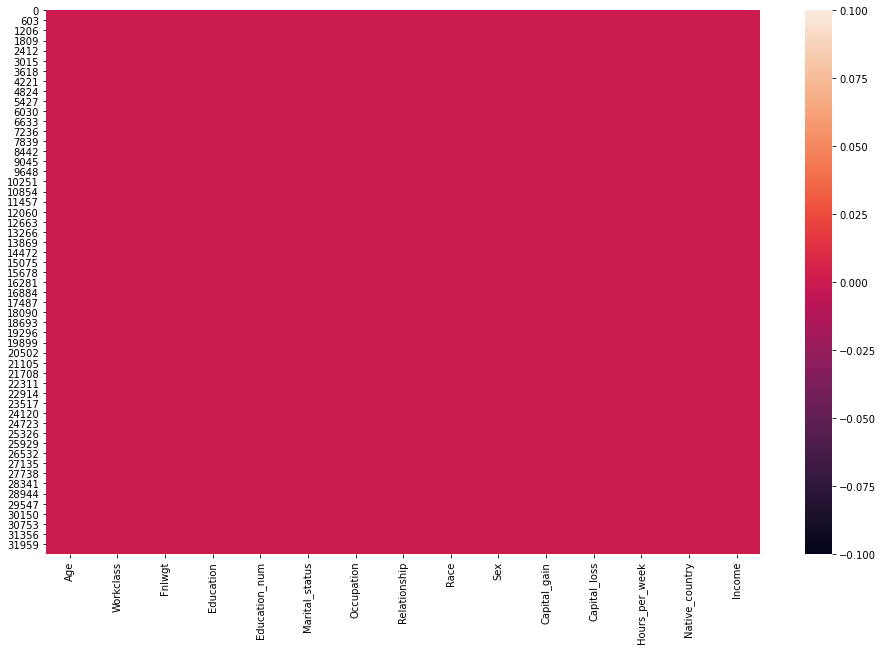

In [8]:
#another way to check missing values
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())
plt.show()  

In [9]:
#viewing top 3 rows of the dataset
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


There are 14 columns present in the dataset, 13 are characteristic variables and one is a target variable.

This is the characteristic variables: age - The age of the user

Workclass - User Profession

final-weight - Final user income

education - user education

education-num - user education ID

marital-status - user's civil status

occupation - User occupation

relationship - User relationship

race - user race

Fri - User Gender

capital-gain - Capital gained

capital-loss - lost capital

hour-per-week - Hours per week

native-country - hometown

# This is the target variable

income - a binary type that indicates the user's income:

     <=50k- User with income less than or equal to 50000

      >50k- User with income over 50000

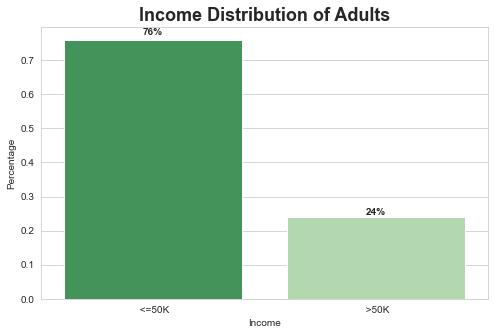

In [10]:
#visualization of "Income" on x axis and "percentage" on y axis by using barplot
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['Income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

We start by analysing our target variable first.

The number of people earning more than 50K dollars an year is one third of the people earning less than it. We should also keep in mind that this data was collected in 1996, so 50K dollars of that time, might not be the same in today's time!

In [11]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"
    
df['age_group'] = df['Age'].apply(age_group)

# Countplots

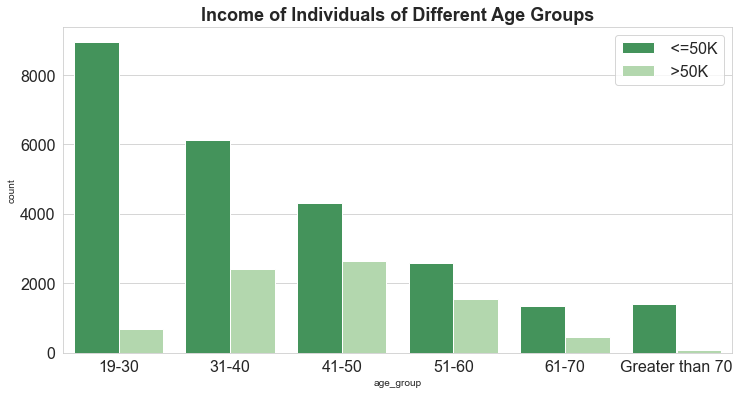

In [12]:
#visualisation of age_group by countplot
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['Income'], palette='Greens_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

We see that people earning more than 50K dollars increase as the age increases upto certain extent.

One might imagine, the number of people earning more than 50K is quite negligible amongst people of age group 19-30. For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it!

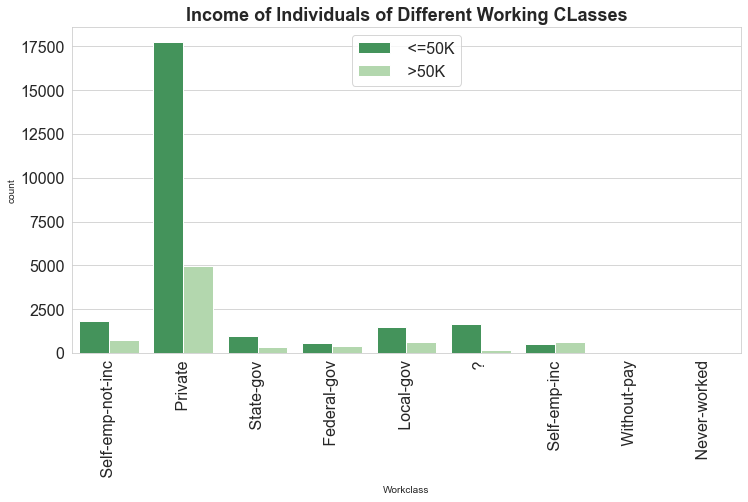

In [13]:
#Visualisation of "workclass" by using countplot
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['Workclass'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# In above we have segregated the incomes of adults on the basis of their different working classes.

Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful! People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year! There is a very less difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt. People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

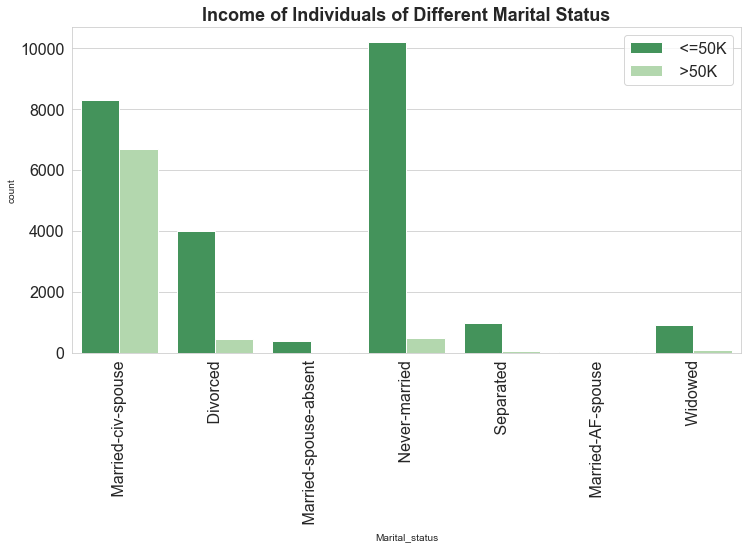

In [14]:
#visualisation of "marital status" by using countplot
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['Marital_status'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories. For others, there are less than 25% of the adults earning more than 50K dollars an year.

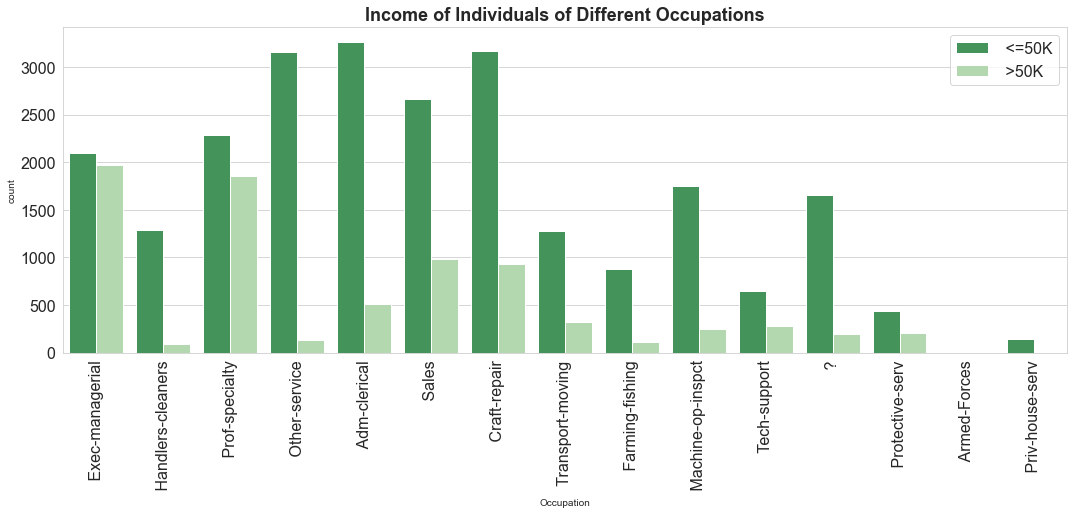

In [15]:
#visualisation of "Occupation" by using countplot
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['Occupation'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year. There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year. Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year. Around 25% of the people working in Sales earn more than 50K dollars an year.

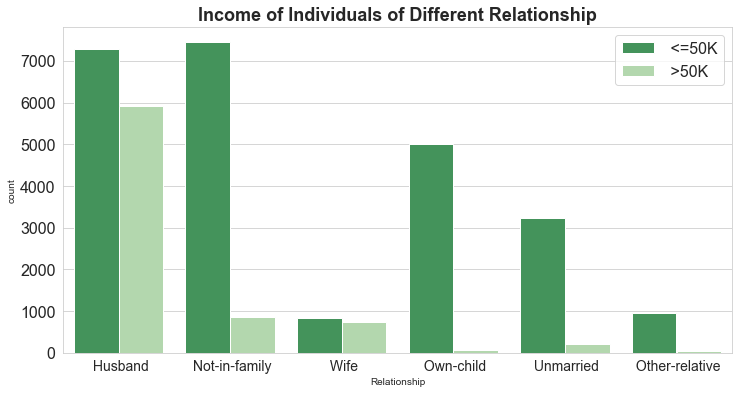

In [16]:
#visualisation of "relationship" by using countplot
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['Relationship'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Wives are equally likely to earn more than 50K dollars an year. For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year. There are just a handful of Unmarried people earning more than 50K dollars an year.

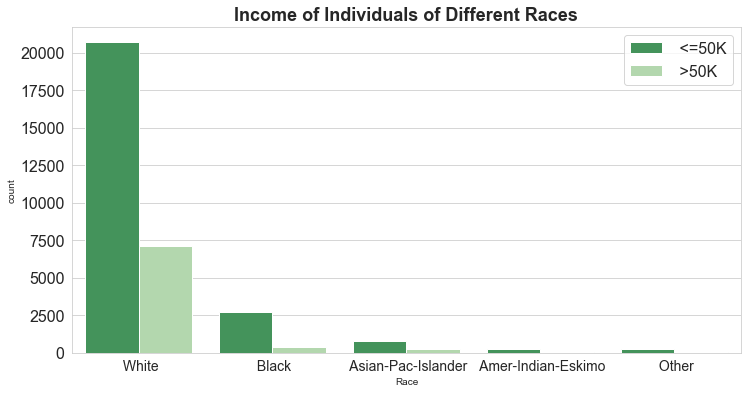

In [17]:
#visualisation of "race" by using counplot
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['Race'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

From above observation it is seen that except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

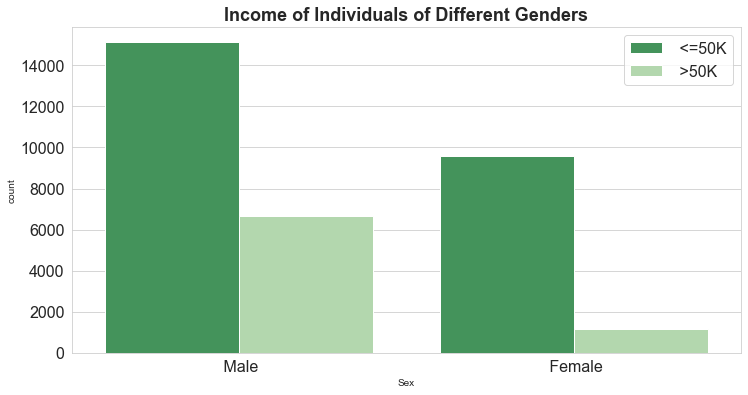

In [18]:
#Visualisation of "sex" by using countplot
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['Sex'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

We can see a significant gap in the earnings between males and females over here.

For Females, there are less than 10% of the adults earning more than 50K dollars an year. In case of Males there are close to 33% of them earning more than 50K dollars an year.

# Correlation Matrix

In [19]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


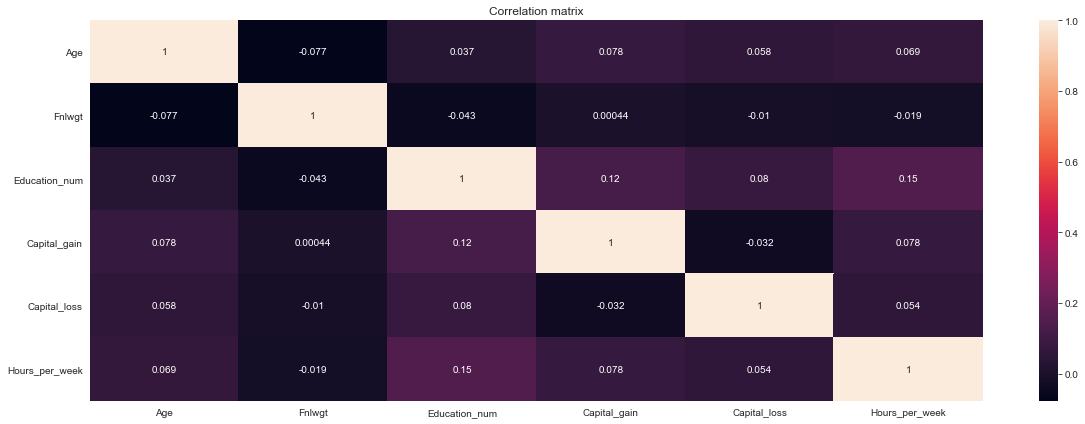

In [20]:
#checking correlation by using heatmap
plt.figure(figsize=(20,7))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot=True)      #visualizing correlation by using heatmap
plt.show()

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

We see that most of the features are positively correlated with the Income Variable. An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

# Pairplot

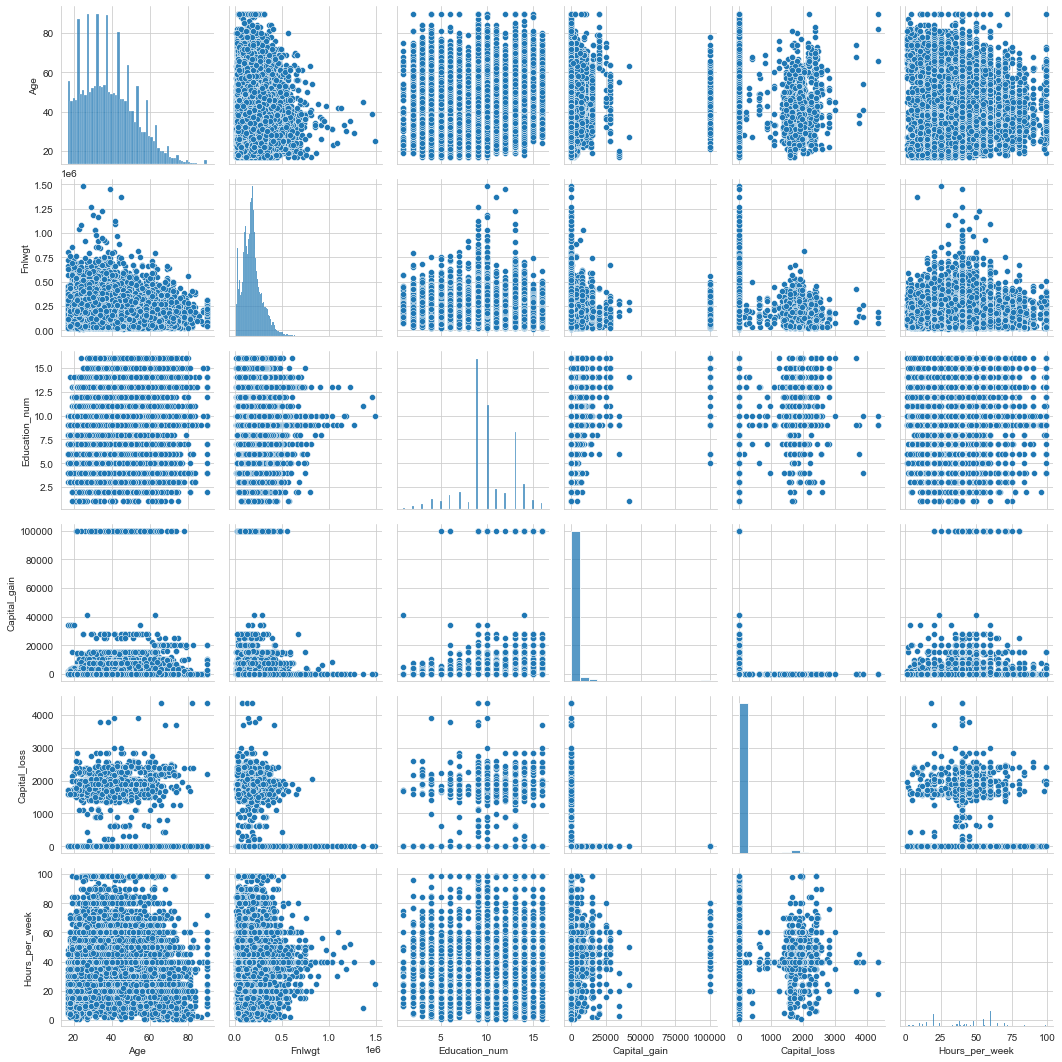

In [22]:
#visualising dataset by using pairplot
sns.pairplot(df)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

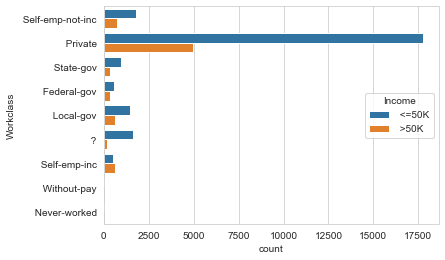

In [23]:
#visualising "workclass" by using countplot in different way
sns.countplot(y='Workclass', hue='Income', data = df)       

#univariate analysis

<AxesSubplot:xlabel='count', ylabel='Occupation'>

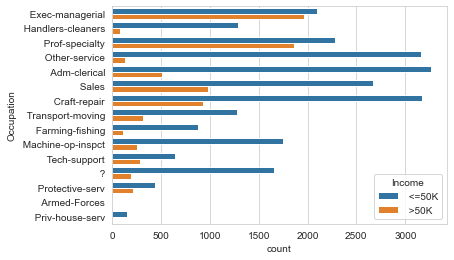

In [24]:
#visualising "Occupation" by using countplot in different way
sns.countplot(y='Occupation', hue='Income', data = df)                  

#univariate analysis

The column education is just a string representation of the column education-num. We will drop the education column. The variables workClass, occupation, native-country have missing values. We will replace the missing values in each column with the most_frequent occurring value of that column.

For defing features, we will create the variable X that receive the characteristic variables of our model, and the variable y that receive the target variable of our model.

We can remove the 'clientid' columns that is not relevant in our model.

In [25]:
# Definition of the columns that will be features (note that the column 'clientid' is not present)
features = [
    'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
    'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
    'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'
]

# Preparation of arguments for ``scikit-learn`` library methods
X = df[features].values

# Catagorial handling

Given a column with categorical variable, what we can do is encoding that column into multiple columns containing binary variables. This process is called "one-hot-encoding" or "dummy encoding".

In [26]:
#label encoding
lbp = LabelEncoder()

In [27]:
# Part of transforming categorical to integer
X[:, 1] = lbp.fit_transform(X[:, 1])

X[:, 3] = lbp.fit_transform(X[:, 3])

X[:, 5] = lbp.fit_transform(X[:, 5])

X[:, 6] = lbp.fit_transform(X[:, 6])

X[:, 7] = lbp.fit_transform(X[:, 7])
X
X[:, 8] = lbp.fit_transform(X[:, 8])

X[:, 9] = lbp.fit_transform(X[:, 9])

X[:, 13] = lbp.fit_transform(X[:, 13])

In [28]:
#to check data from first three rows
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60


In [29]:
X[0:3]

array([[50, 6, 83311, 9, 13, 2, 4, 0, 4, 1, 0, 0, 13, 39],
       [38, 4, 215646, 11, 9, 0, 6, 1, 4, 1, 0, 0, 40, 39],
       [53, 4, 234721, 1, 7, 2, 6, 0, 2, 1, 0, 0, 40, 39]], dtype=object)

In [30]:
# converting the Label to a numeric format for testing later...
LE = LabelEncoder()

y = LE.fit_transform(df["Income"])

# Scaling of numerical data

There is a big difference between high numbers and low numbers, so we have to scale the data to keep them on same scale.

In [31]:
#Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.83709708,  1.46388339, -1.0087417 , ..., -0.21666301,
        -2.22212013,  0.29157343],
       [-0.04264043,  0.09012148,  0.24504633, ..., -0.21666301,
        -0.03542999,  0.29157343],
       [ 1.05703146,  0.09012148,  0.42576955, ..., -0.21666301,
        -0.03542999,  0.29157343],
       ...,
       [ 1.42358875,  0.09012148, -0.3588108 , ..., -0.21666301,
        -0.03542999,  0.29157343],
       [-1.21562378,  0.09012148,  0.11092744, ..., -0.21666301,
        -1.65520046,  0.29157343],
       [ 0.98372   ,  0.77700244,  0.92986178, ..., -0.21666301,
        -0.03542999,  0.29157343]])

# Dividing into training and testing sets

Now we need to convert our data into training and testing sets. We will use 75% as our training data and test our model on the remaining 25% with Scikit-learn's train_test_split function.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, X_train, 
         y_train, cv=5)
print(np.mean(scores))

0.8253480753480755


# Building the models

1. Naive Bayes

The Naive Bayes algorithm is a simple classification algorithm that uses historical data to predict the classification of new data. It works by calculating the probability of an event occurring given that another event has already occurred.

In [34]:
nb = GaussianNB()

In [35]:
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

In [36]:
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_nb = roc_auc_score(y_test, y_pred_nb)

In [37]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6193
           1       0.68      0.33      0.44      1947

    accuracy                           0.80      8140
   macro avg       0.75      0.64      0.66      8140
weighted avg       0.79      0.80      0.78      8140



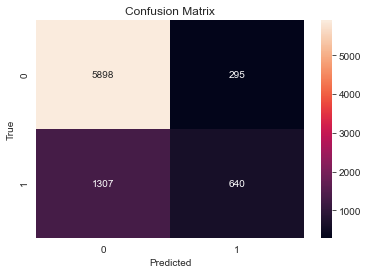

In [38]:
#visualising confusion matrix of "naive bayes" by using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_nb),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 2. Decision Tree

The Decision Tree algorithm are statistical models that use supervised training for data classification and prediction. These models use the divide-and-conquer strategy: a complex problem is decomposed into simpler sub-problems and recursively this technique is applied to each sub. -problem

In [39]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_dt)

In [42]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6193
           1       0.62      0.63      0.62      1947

    accuracy                           0.82      8140
   macro avg       0.75      0.75      0.75      8140
weighted avg       0.82      0.82      0.82      8140



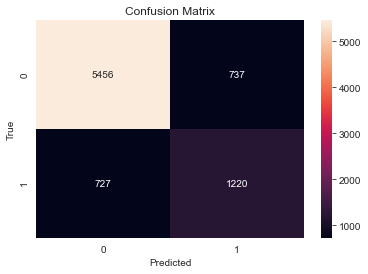

In [43]:
#visualising confusion matrix of "decision tree" by using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 3. Random Forest

The Random Forest algorithm creates a forest in a random way, creating several decision trees and combining them, each tree tries to estimate a ranking and this is called as “vote”, thus to obtain a more accurate and more stable prediction.

In [44]:
rf = RandomForestClassifier(n_estimators = 40, criterion= 'entropy', random_state= 0)

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [46]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_rf)

In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6193
           1       0.73      0.61      0.66      1947

    accuracy                           0.85      8140
   macro avg       0.81      0.77      0.78      8140
weighted avg       0.85      0.85      0.85      8140



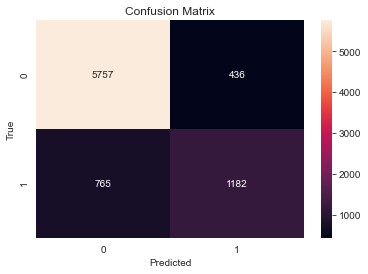

In [48]:
#visualising confusion matrix of "Random forest" by using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 4. KNN

The KNN or k-nearest neighbor algorithm is a very simple machine learning algorithm. It uses some sort of similarity measure to tell which class the new data falls into, in which case we'll use 5 nearest neighbors.

In [49]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_knn)

In [52]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6193
           1       0.65      0.57      0.61      1947

    accuracy                           0.82      8140
   macro avg       0.76      0.74      0.75      8140
weighted avg       0.82      0.82      0.82      8140



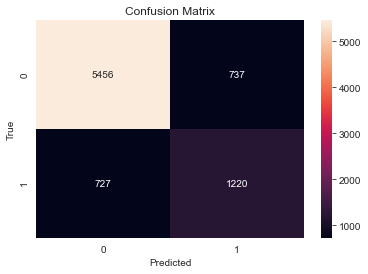

In [53]:
#visualising confusion matrix of "KNN" by using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 5. Logistic Regression

Logistic regression algorithm is used where a discrete output is expected, (eg Predict whether a user is a good or bad payer). Typically, logistic regression uses some function to squeeze values into a given range.

In [54]:
rl = LogisticRegression(random_state=0)

In [55]:
rl.fit(X_test, y_test)

LogisticRegression(random_state=0)

In [56]:
y_pred_rl = rl.predict(X_test)

accuracy_rl = accuracy_score(y_test, y_pred_rl)
recall_rl = recall_score(y_test, y_pred_rl)
precision_rl = precision_score(y_test, y_pred_rl)
f1_rl = f1_score(y_test, y_pred_rl)
roc_rl = roc_auc_score(y_test, y_pred_rl)

In [57]:
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6193
           1       0.70      0.45      0.55      1947

    accuracy                           0.82      8140
   macro avg       0.77      0.70      0.72      8140
weighted avg       0.81      0.82      0.81      8140



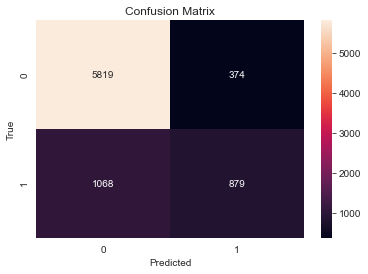

In [58]:
#visualising confusion matrix of "Logistic Regression" by using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rl),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6. SVM (Support Vector Machines)

The SVM algorithm separates data points using a line. This line is chosen in such a way that it will be the most important of the closest data points in 2 categories.

In [59]:
svm = SVC(kernel = 'linear', random_state=0)

In [60]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [61]:
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_svm = roc_auc_score(y_test, y_pred_svm)

In [62]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6193
           1       0.79      0.29      0.43      1947

    accuracy                           0.81      8140
   macro avg       0.80      0.63      0.66      8140
weighted avg       0.81      0.81      0.78      8140



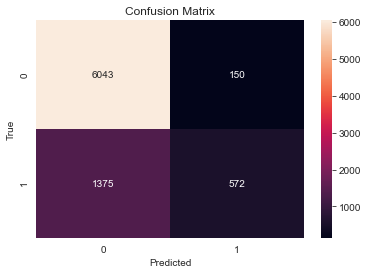

In [63]:
#visualising confusion matrix of "SVM" by using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_svm),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 7. Neural networks

The purpose of the Neural Networks algorithm is to imitate the nervous system of humans in the learning process, it is inspired by biological neural networks

In [65]:
rn = MLPClassifier(verbose = True, max_iter= 250, tol = 0.000010)

In [66]:
rn.fit(X_train, y_train)

Iteration 1, loss = 0.43837226
Iteration 2, loss = 0.36140490
Iteration 3, loss = 0.34072473
Iteration 4, loss = 0.33108671
Iteration 5, loss = 0.32762612
Iteration 6, loss = 0.32522040
Iteration 7, loss = 0.32415715
Iteration 8, loss = 0.32334789
Iteration 9, loss = 0.32243609
Iteration 10, loss = 0.32210819
Iteration 11, loss = 0.32087106
Iteration 12, loss = 0.32021042
Iteration 13, loss = 0.32003513
Iteration 14, loss = 0.31948290
Iteration 15, loss = 0.31893328
Iteration 16, loss = 0.31840947
Iteration 17, loss = 0.31799666
Iteration 18, loss = 0.31774347
Iteration 19, loss = 0.31705564
Iteration 20, loss = 0.31678012
Iteration 21, loss = 0.31646715
Iteration 22, loss = 0.31604201
Iteration 23, loss = 0.31558212
Iteration 24, loss = 0.31523572
Iteration 25, loss = 0.31494363
Iteration 26, loss = 0.31493219
Iteration 27, loss = 0.31405478
Iteration 28, loss = 0.31375378
Iteration 29, loss = 0.31339703
Iteration 30, loss = 0.31364389
Iteration 31, loss = 0.31277005
Iteration 32, los

MLPClassifier(max_iter=250, tol=1e-05, verbose=True)

In [67]:
y_pred_rn = rn.predict(X_test)

accuracy_rn = accuracy_score(y_test, y_pred_rn)
recall_rn = recall_score(y_test, y_pred_rn)
precision_rn = precision_score(y_test, y_pred_rn)
f1_rn = f1_score(y_test, y_pred_rn)
roc_rn = roc_auc_score(y_test, y_pred_rn)

In [68]:
print(classification_report(y_test, y_pred_rn))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6193
           1       0.73      0.57      0.64      1947

    accuracy                           0.85      8140
   macro avg       0.80      0.75      0.77      8140
weighted avg       0.84      0.85      0.84      8140



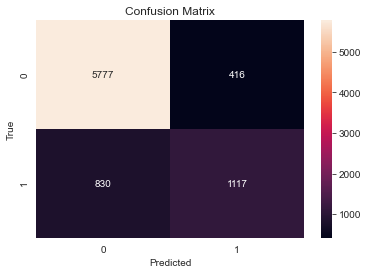

In [69]:
#visualising confusion matrix of "Neural networks" by using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rn),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 5. Viewing the results of all models

In [70]:
#viewing all f1 score, auc, precision, recall, accuracy of all the models
models = [('Naive Bayes', accuracy_nb, recall_nb, precision_nb, f1_nb, roc_nb),
          ('Decision Tree', accuracy_dt, recall_dt, precision_dt, f1_dt, roc_dt),
          ('Random Forest', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf),
          ('kNN', accuracy_knn, recall_knn, precision_knn, f1_knn, roc_knn),
          ('Logistic Regression', accuracy_rl, recall_rl, precision_rl, f1_rl, roc_rl),
          ('SVM', accuracy_svm, recall_svm, precision_svm, f1_svm, roc_svm),
          ('Neural Networks', accuracy_rn, recall_rn, precision_rn, f1_rn, roc_rn)]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC'])

df_all_models                

#preparing the data frame

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC
0,Naive Bayes,0.803194,0.328711,0.684492,0.444136,0.640538
1,Decision Tree,0.820147,0.626605,0.623403,0.625000,0.753800
2,Random Forest,0.852457,0.607088,0.730532,0.663114,0.768343
3,kNN,0.822850,0.572162,0.646547,0.607084,0.736913
4,Logistic Regression,0.822850,0.451464,0.701516,0.549375,0.695537
5,SVM,0.812654,0.293785,0.792244,0.428625,0.634782
6,Neural Networks,0.846929,0.573703,0.728637,0.641954,0.753265


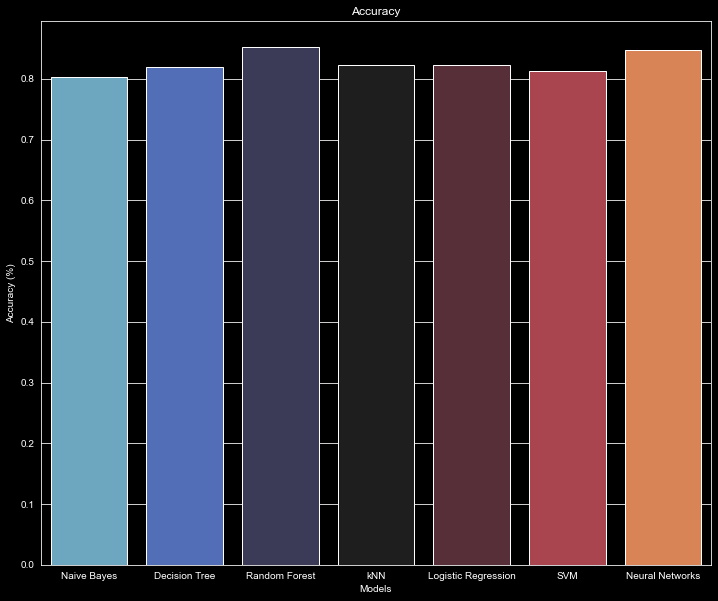

In [71]:
#visualising by plotting barplots of all the models
plt.style.use("dark_background")

plt.subplots(figsize=(12, 10))
sns.barplot(y = df_all_models['Accuracy (%)'], x = df_all_models['Model'], palette = 'icefire')
plt.xlabel("Models")
plt.title('Accuracy')
plt.show()

# ROC Curve

In [72]:
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_pred_rl)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_rn, tpr_rn, _ = roc_curve(y_test, y_pred_rn)

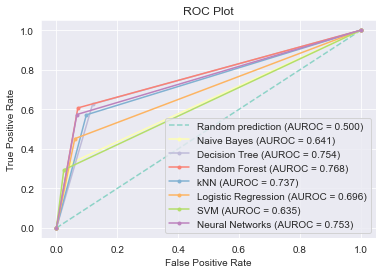

In [73]:
sns.set_style('darkgrid')

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.plot(fpr_nb, tpr_nb, marker='.', label='Naive Bayes (AUROC = %0.3f)' % roc_nb)
plt.plot(fpr_dt, tpr_dt, marker='.', label='Decision Tree (AUROC = %0.3f)' % roc_dt)
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest (AUROC = %0.3f)' % roc_rf)
plt.plot(fpr_knn, tpr_knn, marker='.', label='kNN (AUROC = %0.3f)' % roc_knn)
plt.plot(fpr_rl, tpr_rl, marker='.', label='Logistic Regression (AUROC = %0.3f)' % roc_rl)
plt.plot(fpr_svm, tpr_svm, marker='.', label='SVM (AUROC = %0.3f)' % roc_svm)
plt.plot(fpr_rn, tpr_rn, marker='.', label='Neural Networks (AUROC = %0.3f)' % roc_rn)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

# Saving the model

In [74]:
filename ="Census Income Data.pkl"  #saving the model as a pickle
pickle.dump(svm, open(filename, 'wb'))

# Conclusion

In [75]:
a=np.array(y_test)
predicted=np.array(svm.predict(X_test))
df_com= pd.DataFrame({"Original":a, "predicted": predicted}, index=range(len(a)))  #creating a data frame
df_com

,Original,predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
8135,0,0
8136,0,0
8137,0,0
8138,0,0
